In [2]:
# This tells matplotlib not to try opening a new window for each plot.
%matplotlib inline

# Import a bunch of libraries.
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
from sklearn.pipeline import Pipeline
from sklearn.datasets import fetch_openml
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LinearRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

In [3]:
import sklearn
sklearn.__version__

'0.23.1'

In [4]:
train_data_raw = pd.read_json('/Users/kanikamahajan/Desktop/MIDS/W207/Projects/Final_project_data/train.json')
test_data_raw = pd.read_json('/Users/kanikamahajan/Desktop/MIDS/W207/Projects/Final_project_data/test.json')
#train_data.head(4)


## Exploratory Data Analysis
* Dataset 
* missing value
* Duplicate records
* Normalizing and Scaling

In [5]:
train_data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4040 entries, 0 to 4039
Data columns (total 32 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   giver_username_if_known                               4040 non-null   object 
 1   number_of_downvotes_of_request_at_retrieval           4040 non-null   int64  
 2   number_of_upvotes_of_request_at_retrieval             4040 non-null   int64  
 3   post_was_edited                                       4040 non-null   int64  
 4   request_id                                            4040 non-null   object 
 5   request_number_of_comments_at_retrieval               4040 non-null   int64  
 6   request_text                                          4040 non-null   object 
 7   request_text_edit_aware                               4040 non-null   object 
 8   request_title                                         4040

In [6]:
# Rounding floats to two decimal places
train_data= train_data_raw.round(decimals=2)

#Missing data (looks good)
train_data.isnull().sum()

giver_username_if_known                                    0
number_of_downvotes_of_request_at_retrieval                0
number_of_upvotes_of_request_at_retrieval                  0
post_was_edited                                            0
request_id                                                 0
request_number_of_comments_at_retrieval                    0
request_text                                               0
request_text_edit_aware                                    0
request_title                                              0
requester_account_age_in_days_at_request                   0
requester_account_age_in_days_at_retrieval                 0
requester_days_since_first_post_on_raop_at_request         0
requester_days_since_first_post_on_raop_at_retrieval       0
requester_number_of_comments_at_request                    0
requester_number_of_comments_at_retrieval                  0
requester_number_of_comments_in_raop_at_request            0
requester_number_of_comm

In [7]:
#Data Distribution

count = train_data['requester_received_pizza'].value_counts() #outcome
print(count)

train_data.describe() #features

False    3046
True      994
Name: requester_received_pizza, dtype: int64


,number_of_downvotes_of_request_at_retrieval,number_of_upvotes_of_request_at_retrieval,post_was_edited,request_number_of_comments_at_retrieval,requester_account_age_in_days_at_request,requester_account_age_in_days_at_retrieval,requester_days_since_first_post_on_raop_at_request,requester_days_since_first_post_on_raop_at_retrieval,requester_number_of_comments_at_request,requester_number_of_comments_at_retrieval,...,requester_number_of_posts_at_retrieval,requester_number_of_posts_on_raop_at_request,requester_number_of_posts_on_raop_at_retrieval,requester_number_of_subreddits_at_request,requester_upvotes_minus_downvotes_at_request,requester_upvotes_minus_downvotes_at_retrieval,requester_upvotes_plus_downvotes_at_request,requester_upvotes_plus_downvotes_at_retrieval,unix_timestamp_of_request,unix_timestamp_of_request_utc
count,4040.000000,4040.000000,4.040000e+03,4040.000000,4040.000000,4040.000000,4040.000000,4040.000000,4040.000000,4040.000000,...,4040.000000,4040.000000,4040.000000,4040.000000,4040.000000,4040.000000,4.040000e+03,4.040000e+03,4.040000e+03,4.040000e+03
mean,2.424505,6.180446,1.005868e+08,2.871040,254.586589,757.692696,16.417010,518.993161,115.098267,289.425743,...,41.151733,0.063614,1.239109,18.076733,1160.079950,2720.342079,3.743236e+03,7.788069e+03,1.342829e+09,1.342826e+09
std,3.023101,10.746320,3.558566e+08,4.723339,303.275743,333.035705,70.651402,267.872592,193.318968,357.416133,...,80.798543,0.325773,0.603083,21.736465,3718.365515,6264.378878,2.583816e+04,3.916741e+04,2.333057e+07,2.332989e+07
min,0.000000,0.000000,0.000000e+00,0.000000,0.000000,45.290000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,-173.000000,-173.000000,0.000000e+00,0.000000e+00,1.297723e+09,1.297723e+09
25%,1.000000,2.000000,0.000000e+00,0.000000,3.475000,522.245000,0.000000,279.010000,0.000000,8.000000,...,2.000000,0.000000,1.000000,1.000000,3.000000,22.000000,9.000000e+00,5.200000e+01,1.320469e+09,1.320466e+09
50%,2.000000,4.000000,0.000000e+00,1.000000,157.065000,753.270000,0.000000,528.780000,24.000000,114.000000,...,13.000000,0.000000,1.000000,11.000000,174.500000,708.000000,3.510000e+02,1.283500e+03,1.342565e+09,1.342561e+09
75%,3.000000,7.000000,0.000000e+00,4.000000,390.090000,900.345000,0.000000,776.230000,140.250000,479.000000,...,46.000000,0.000000,1.000000,27.000000,1163.750000,3304.000000,2.303750e+03,6.829000e+03,1.364618e+09,1.364614e+09
max,47.000000,345.000000,1.380909e+09,61.000000,2809.750000,2879.280000,785.460000,1025.410000,994.000000,1000.000000,...,999.000000,5.000000,9.000000,186.000000,155010.000000,223708.000000,1.286864e+06,2.046482e+06,1.381552e+09,1.381523e+09


In [8]:
#Normalizing and Scaling

## Features of Interest:
* number_of_upvotes_of_request_at_retrieval (popularity) 2
* frequency of words analysis (request text)
* request_number_of_comments_at_retrieval 5
* requester_account_age_in_days_at_retrieval (requester experience with reddit) 10
* requester_days_since_first_post_on_raop_at_retrieval (how old is the post) 12
* requester_number_of_comments_in_raop_at_retrieval (activity) 16
* requester_number_of_posts_at_retrieval (user activity) 18
* requester_number_of_posts_on_raop_at_retrieval20
* requester_number_of_subreddits_at_request 21
* requester_upvotes_minus_downvotes_at_retrieval (to take into account dislikes)25
* requester_received_pizza (outcome) 22

## Final model ideas
* Text length (word count) 
* Title lenth (word count)
* NLTK stemming, lemetization, tfi-di 
* unix_timestamp_of_request_utc (temporality)
* valid usernames


In [58]:
from sklearn.feature_extraction.text import CountVectorizer

# Extracting post text from df
text_vector = train_data.iloc[:, 6]

#Using Countvectorizer to convert into bag of words
vectorizer = CountVectorizer(stop_words='english', min_df=5)
vectorizer.fit(text_vector)


# text into the vectorizer to get back counts
vector = vectorizer.transform(text_vector)

# Our final vector:
print('Full vector: ')
text_np = vector.toarray()

#Convert to pandas df
df = pd.DataFrame(text_np, columns=vectorizer.get_feature_names())
df.head()

df.info()


Full vector: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4040 entries, 0 to 4039
Columns: 2821 entries, 00 to zone
dtypes: int64(2821)
memory usage: 87.0 MB


In [60]:
#Combine new text processed features with main dataframe
#print(train_data.info())
df_new = pd.concat([train_data, df], axis=1, join="inner")

# calling count_nonzero() method to count non-zeros (confirming join valid)
series = df['zone']
ss = series.to_numpy()
np.count_nonzero(ss)

df_new.head()


,giver_username_if_known,number_of_downvotes_of_request_at_retrieval,number_of_upvotes_of_request_at_retrieval,post_was_edited,request_id,request_number_of_comments_at_retrieval,request_text,request_text_edit_aware,request_title,requester_account_age_in_days_at_request,...,younger,youngest,youth,youtube,yr,yummy,za,zealand,zero,zone
0,N/A,0,1,0,t3_l25d7,0,Hi I am in need of food for my 4 children we a...,Hi I am in need of food for my 4 children we a...,Request Colorado Springs Help Us Please,0.00,...,0,0,0,0,0,0,0,0,0,0
1,N/A,2,5,0,t3_rcb83,0,I spent the last money I had on gas today. Im ...,I spent the last money I had on gas today. Im ...,"[Request] California, No cash and I could use ...",501.11,...,0,0,0,0,0,0,0,0,0,0
2,N/A,0,3,0,t3_lpu5j,0,My girlfriend decided it would be a good idea ...,My girlfriend decided it would be a good idea ...,"[Request] Hungry couple in Dundee, Scotland wo...",0.00,...,0,0,0,0,0,0,0,0,0,0
3,N/A,0,1,1,t3_mxvj3,4,"It's cold, I'n hungry, and to be completely ho...","It's cold, I'n hungry, and to be completely ho...","[Request] In Canada (Ontario), just got home f...",6.52,...,0,0,0,0,0,0,0,0,0,0
4,N/A,6,6,0,t3_1i6486,5,hey guys:\n I love this sub. I think it's grea...,hey guys:\n I love this sub. I think it's grea...,[Request] Old friend coming to visit. Would LO...,162.06,...,0,0,0,0,0,0,0,0,0,0


In [61]:
#Selecting features and outcome data columns 

cols = df_new.columns
desired_cols = list([cols[2], cols[5], cols[10], cols[12], cols[16], cols[18], cols[20], cols[21], cols[25]]) + list(cols[32:])
#df_new[desired_cols].head(100)

x = df_new[desired_cols] #features
y = df_new.iloc[:, 22]

df_new.to_csv('baseline_KM.csv')

In [62]:
#test data does not have the outcome column so splitting training data into test, dev and training
from sklearn.model_selection import train_test_split
train_ratio = 0.75
validation_ratio = 0.15
test_ratio = 0.10

# train is now 75% of the entire data set
# the _junk suffix means that we drop that variable completely
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=1 - train_ratio, random_state=1)

# test is now 10% of the initial data set
# validation is now 15% of the initial data set
X_dev, X_test, y_dev, y_test = train_test_split(X_test, y_test, test_size=test_ratio/(test_ratio + validation_ratio), random_state=1) 

#print(X_train, X_dev, X_test)
print(X_test.shape)
df_new.shape

(404, 2830)


(4040, 2853)

In [63]:
#test data does not have the outcome column so splitting training data into test and training
# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42) 

In [64]:
#K neighbors classifier
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [65]:
y_pred = classifier.predict(X_dev)

In [66]:
print(confusion_matrix(y_dev, y_pred))
print(classification_report(y_dev, y_pred))
report = classification_report(y_dev, y_pred, output_dict=True)
print("Accuracy for 5 Nearest Neighbor model", report['accuracy'])

[[408  53]
 [111  34]]
              precision    recall  f1-score   support

       False       0.79      0.89      0.83       461
        True       0.39      0.23      0.29       145

    accuracy                           0.73       606
   macro avg       0.59      0.56      0.56       606
weighted avg       0.69      0.73      0.70       606

Accuracy for 5 Nearest Neighbor model 0.7293729372937293


In [67]:
#Logistic Regression

# import the class
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
logreg = LogisticRegression(max_iter= 1000)

# fit the model with data
logreg.fit(X_train,y_train)

#
y_pred=logreg.predict(X_dev)

/Users/kanikamahajan/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [68]:
print(confusion_matrix(y_dev, y_pred))
print(classification_report(y_dev, y_pred))
report_log = classification_report(y_dev, y_pred, output_dict=True)
print("Accuracy for Logistic regression model is", report_log['accuracy'])

[[421  40]
 [ 74  71]]
              precision    recall  f1-score   support

       False       0.85      0.91      0.88       461
        True       0.64      0.49      0.55       145

    accuracy                           0.81       606
   macro avg       0.75      0.70      0.72       606
weighted avg       0.80      0.81      0.80       606

Accuracy for Logistic regression model is 0.8118811881188119


In [69]:
# import the metrics class for printing confusion matrix
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_dev, y_pred)
cnf_matrix

array([[421,  40],
       [ 74,  71]])

Text(0.5, 257.44, 'Predicted label')

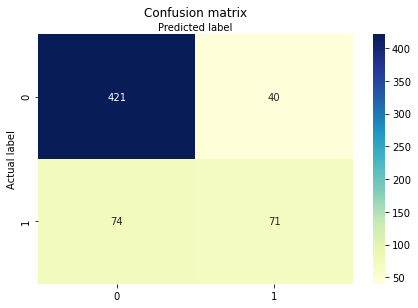

In [70]:
#Visualizing Confusion Matrix using Heatmap
import seaborn as sns
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [71]:
##SAMPLE TEXT 

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
sample_text = ["One of the most basic ways we can numerically represent words", 
               "is through the one-hot encoding method (also sometimes called ",
               "count vectorizing)."]
vectorizer.fit(sample_text)
print('Vocabulary: ')
print(vectorizer.vocabulary_)

In [ ]:
# text into the vectorizer to get back counts
vector = vectorizer.transform(sample_text)

# Our final vector:
print('Full vector: ')
print(vector.toarray())
print(vector)